<a href="https://colab.research.google.com/github/DikshantPatel2210/Timeseries_Forcasting_Air_Passengers/blob/main/TimeSeries_Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
df["yearMonth"] = pd.to_datetime("01" + "-" + df["month"].astype(str) + "-" + df["year"].astype(str))
df.set_index('yearMonth', inplace = True)

df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

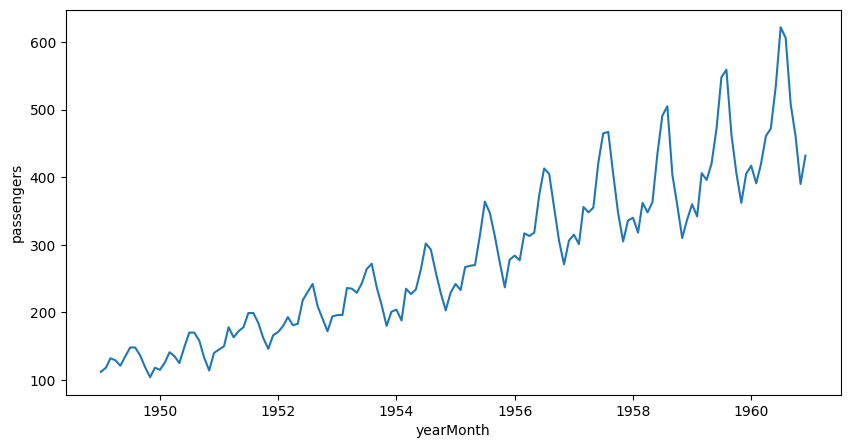

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df , x = df.index, y = df.passengers)

In [ ]:
df["rollMean"] = df.passengers.rolling(12).mean()
df["rollStd"] = df.passengers.rolling(12).std()

<Axes: xlabel='yearMonth', ylabel='passengers'>

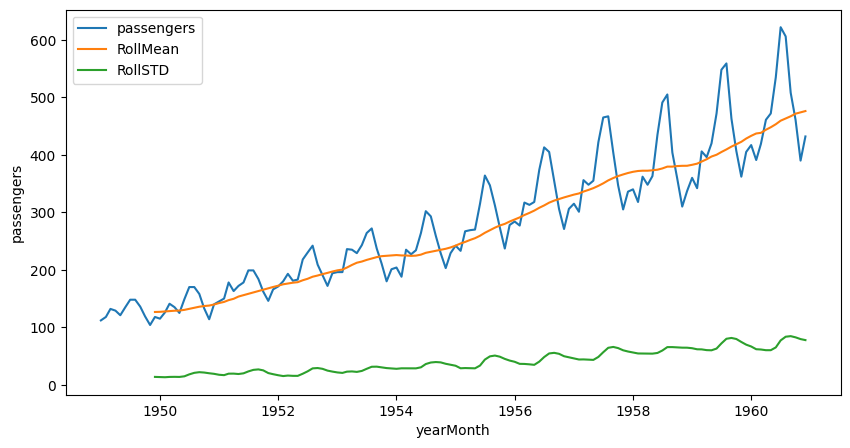

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df , x = df.index, y = df.passengers, label="passengers")
sns.lineplot(data = df , x = df.index, y = df.rollMean, label="RollMean")
sns.lineplot(data = df , x = df.index, y = df.rollStd, label = "RollSTD")


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfTest = adfuller(df["passengers"], autolag = "AIC")

In [ ]:
adfTest

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
stats = pd.Series(adfTest[0 : 4], index = ["Test_Statistic", "p-value", "Lags Used", "Number of Observations Used"])
stats

,0
Test_Statistic,0.815369
p-value,0.991880
Lags Used,13.000000
Number of Observations Used,130.000000


In [ ]:
for key, value in adfTest[4].items():
    print(f"Critical Value {key} : {value}")

Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


In [ ]:
def test_stationarity(dataframe , var):
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()

  adfTest = adfuller(dataframe[var], autolag = "AIC")
  stats = pd.Series(adfTest[0 : 4], index = ["Test_Statistic", "p-value", "Lags Used", "Number of Observations Used"])
  print(stats)

  for key, value in adfTest[4].items():
    print(f"Critical Value {key} : {value}")

  sns.lineplot(data = dataframe , x = dataframe.index, y = dataframe[var], label="passengers")
  sns.lineplot(data = dataframe , x = dataframe.index, y = dataframe["rollMean"], label="RollMean")
  sns.lineplot(data = dataframe , x = dataframe.index, y = dataframe["rollStd"], label = "RollSTD")
  plt.show()


In [ ]:
df.head()

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


Test_Statistic                   0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of Observations Used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


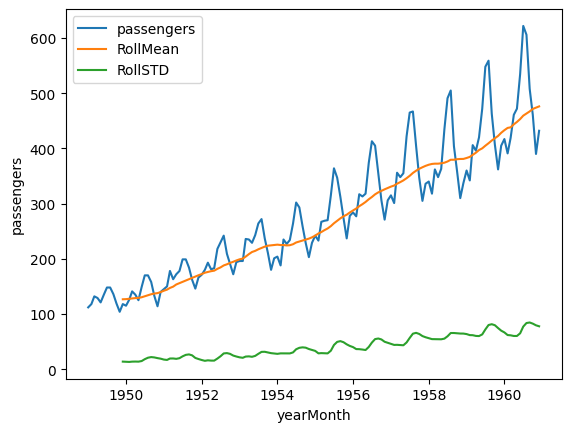

In [ ]:
test_stationarity(df, "passengers")

In [ ]:
air_df = pd.DataFrame(df["passengers"])

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
#time shift

air_df["shift"] = air_df['passengers'].shift()
air_df["ShiftDiff"] = air_df['passengers'].diff()
air_df.head()

,passengers,shift,ShiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


<ipython-input-39-50b7d356d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
<ipython-input-39-50b7d356d253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()


Test_Statistic                  -2.829267
p-value                          0.054213
Lags Used                       12.000000
Number of Observations Used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


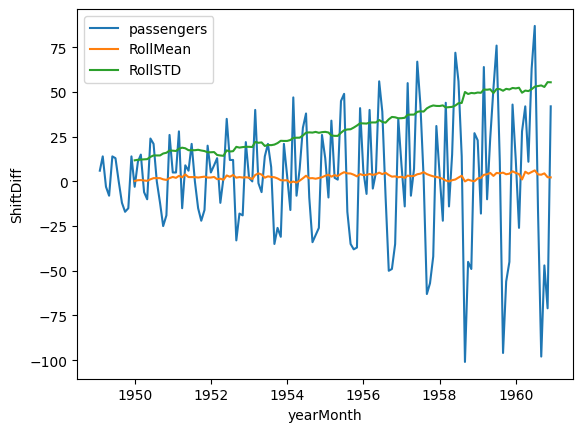

In [ ]:
test_stationarity(air_df.dropna(), "ShiftDiff")

In [ ]:
#LOG
log_df = df.copy()
log_df["log"] = log_df['passengers'].apply(lambda x: np.log(x))
log_df.head(3)

,year,month,passengers,rollMean,rollStd,log
yearMonth,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,4.718499
1949-02-01,1949,Feb,118,NaN,NaN,4.770685
1949-03-01,1949,Mar,132,NaN,NaN,4.882802


<ipython-input-39-50b7d356d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
<ipython-input-39-50b7d356d253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()


Test_Statistic                  -1.391891
p-value                          0.586157
Lags Used                       13.000000
Number of Observations Used    119.000000
dtype: float64
Critical Value 1% : -3.4865346059036564
Critical Value 5% : -2.8861509858476264
Critical Value 10% : -2.579896092790057


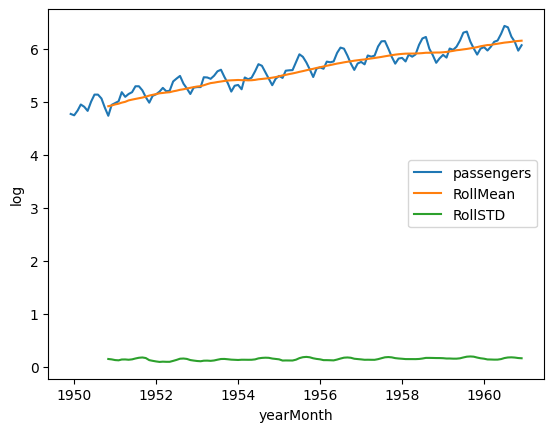

In [ ]:
test_stationarity(log_df.dropna(), "log")

In [ ]:
#SQRT
sqrt_df = df.copy()
sqrt_df["sqrt"] = sqrt_df['passengers'].apply(lambda x: np.sqrt(x))
sqrt_df.head(3)


,year,month,passengers,rollMean,rollStd,sqrt
yearMonth,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,10.583005
1949-02-01,1949,Feb,118,NaN,NaN,10.862780
1949-03-01,1949,Mar,132,NaN,NaN,11.489125


<ipython-input-39-50b7d356d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
<ipython-input-39-50b7d356d253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()


Test_Statistic                  -0.335199
p-value                          0.920369
Lags Used                       13.000000
Number of Observations Used    119.000000
dtype: float64
Critical Value 1% : -3.4865346059036564
Critical Value 5% : -2.8861509858476264
Critical Value 10% : -2.579896092790057


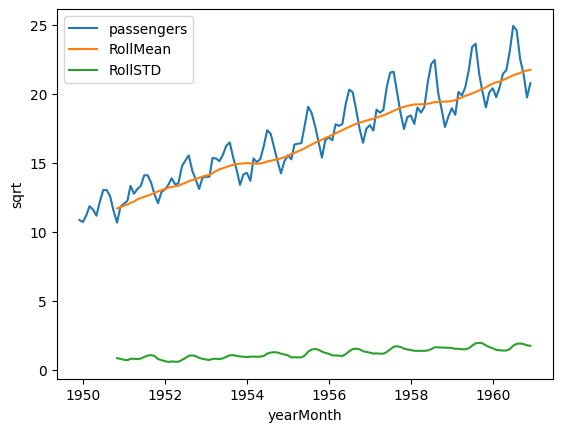

In [ ]:
test_stationarity(sqrt_df.dropna(), "sqrt")

In [ ]:
#CBRT

cbrt_df = df.copy()
cbrt_df["cbrt"] = cbrt_df['passengers'].apply(lambda x: np.cbrt(x))
cbrt_df

,year,month,passengers,rollMean,rollStd,cbrt
yearMonth,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,4.820285
1949-02-01,1949,Feb,118,NaN,NaN,4.904868
1949-03-01,1949,Mar,132,NaN,NaN,5.091643
1949-04-01,1949,Apr,129,NaN,NaN,5.052774
1949-05-01,1949,May,121,NaN,NaN,4.946087
...,...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500,8.462348
1960-09-01,1960,Sep,508,467.083333,84.617276,7.979112
1960-10-01,1960,Oct,461,471.583333,82.541954,7.725032


<ipython-input-39-50b7d356d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
<ipython-input-39-50b7d356d253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()


Test_Statistic                  -0.710790
p-value                          0.843935
Lags Used                       13.000000
Number of Observations Used    119.000000
dtype: float64
Critical Value 1% : -3.4865346059036564
Critical Value 5% : -2.8861509858476264
Critical Value 10% : -2.579896092790057


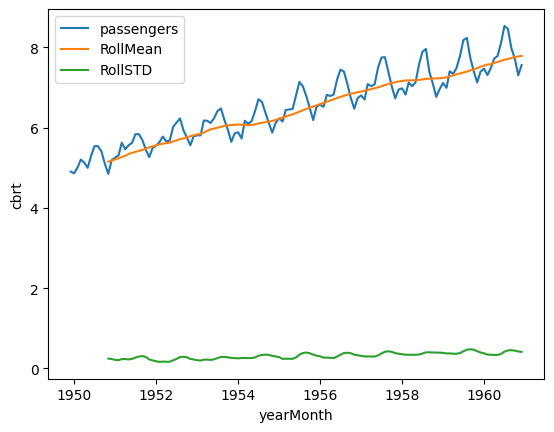

In [ ]:
test_stationarity(cbrt_df.dropna(), "cbrt")

In [ ]:
#LOG&SQRT
log_df2 = log_df.copy()
log_df2["log_sqrt"] = np.sqrt(log_df2["log"])
log_df2['log_shiftDiff'] = log_df2["log_sqrt"] - log_df2['log_sqrt'].shift()
log_df2.head()

,year,month,passengers,rollMean,rollStd,log,log_sqrt,log_shiftDiff
yearMonth,,,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,4.718499,2.172211,NaN
1949-02-01,1949,Feb,118,NaN,NaN,4.770685,2.184190,0.011979
1949-03-01,1949,Mar,132,NaN,NaN,4.882802,2.209706,0.025517
1949-04-01,1949,Apr,129,NaN,NaN,4.859812,2.204498,-0.005208
1949-05-01,1949,May,121,NaN,NaN,4.795791,2.189929,-0.014569


<ipython-input-39-50b7d356d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
<ipython-input-39-50b7d356d253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()


Test_Statistic                  -1.548330
p-value                          0.509482
Lags Used                       13.000000
Number of Observations Used    119.000000
dtype: float64
Critical Value 1% : -3.4865346059036564
Critical Value 5% : -2.8861509858476264
Critical Value 10% : -2.579896092790057


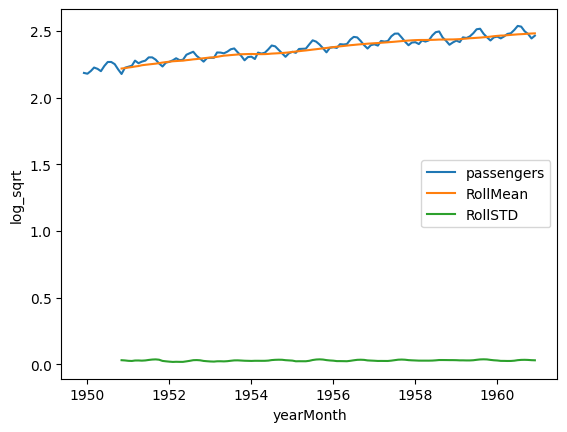

In [ ]:
test_stationarity(log_df2.dropna(), "log_sqrt")

<ipython-input-39-50b7d356d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
<ipython-input-39-50b7d356d253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()


Test_Statistic                  -3.079116
p-value                          0.028138
Lags Used                       13.000000
Number of Observations Used    119.000000
dtype: float64
Critical Value 1% : -3.4865346059036564
Critical Value 5% : -2.8861509858476264
Critical Value 10% : -2.579896092790057


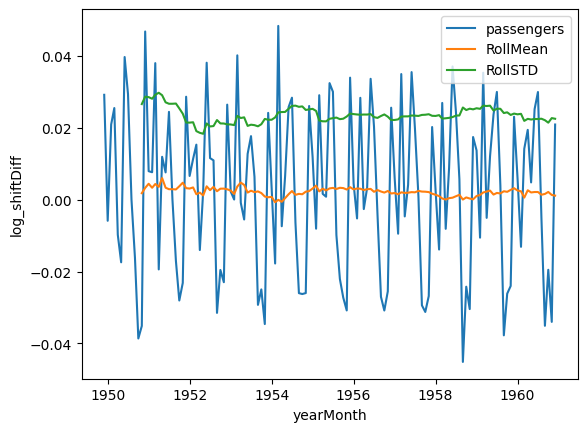

In [ ]:
test_stationarity(log_df2.dropna(), "log_shiftDiff")

In [ ]:
#LOG&CBRT&SHIFT
log_df3 = log_df.copy()
log_df3["log_cbrt"] = np.cbrt(log_df3["log"])
log_df3['log_shiftDiff'] = log_df3["log_cbrt"] - log_df3['log_cbrt'].shift()
log_df3.head()

,year,month,passengers,rollMean,rollStd,log,log_cbrt,log_shiftDiff
yearMonth,,,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,4.718499,1.677263,NaN
1949-02-01,1949,Feb,118,NaN,NaN,4.770685,1.683424,0.006161
1949-03-01,1949,Mar,132,NaN,NaN,4.882802,1.696510,0.013086
1949-04-01,1949,Apr,129,NaN,NaN,4.859812,1.693843,-0.002667
1949-05-01,1949,May,121,NaN,NaN,4.795791,1.686372,-0.007471


<ipython-input-39-50b7d356d253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollMean"] = dataframe[var].rolling(window= 12).mean()
<ipython-input-39-50b7d356d253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["rollStd"] = dataframe[var].rolling(window= 12).std()


Test_Statistic                  -3.064224
p-value                          0.029317
Lags Used                       13.000000
Number of Observations Used    119.000000
dtype: float64
Critical Value 1% : -3.4865346059036564
Critical Value 5% : -2.8861509858476264
Critical Value 10% : -2.579896092790057


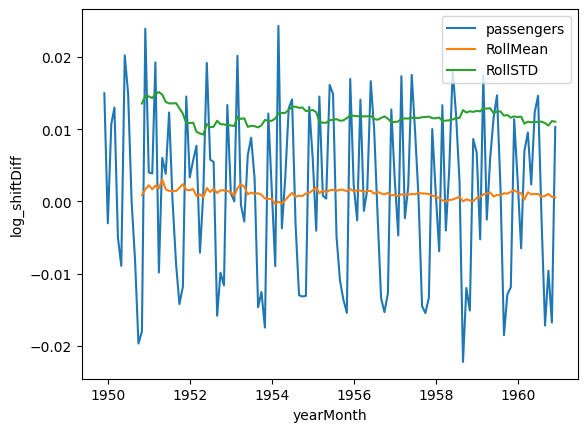

In [ ]:
test_stationarity(log_df3.dropna(), "log_shiftDiff")

NEXT- 2

In [ ]:
airP = df[["passengers"]].copy(deep = True)
airP["firstDiff"] = airP["passengers"].diff()
airP["secondDiff"] = airP["firstDiff"].diff()
airP.head()

,passengers,firstDiff,secondDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

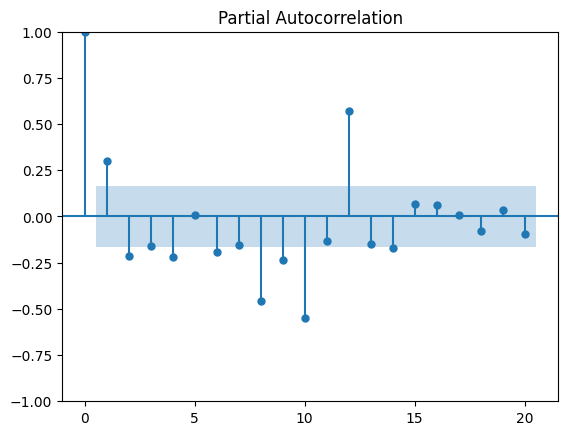

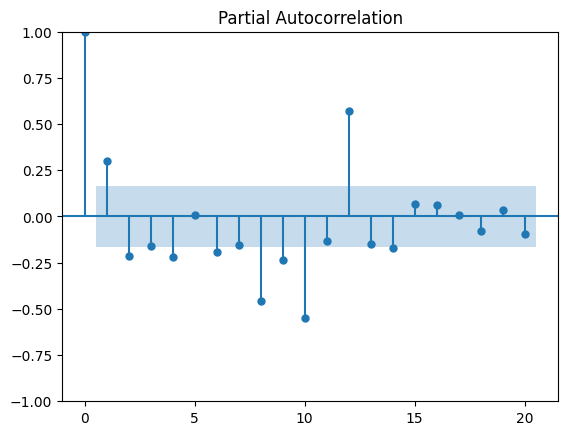

In [ ]:
plot_pacf(airP['firstDiff'].dropna(),lags = 20)

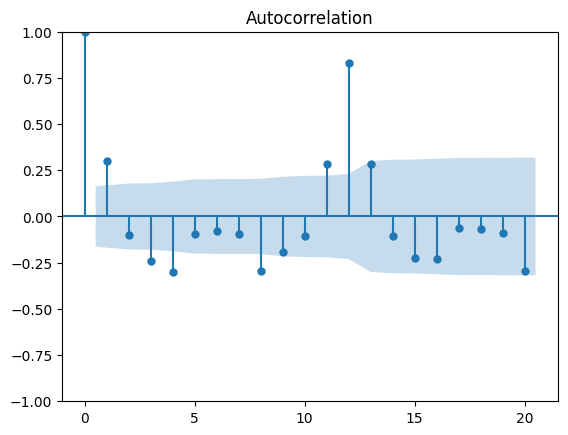

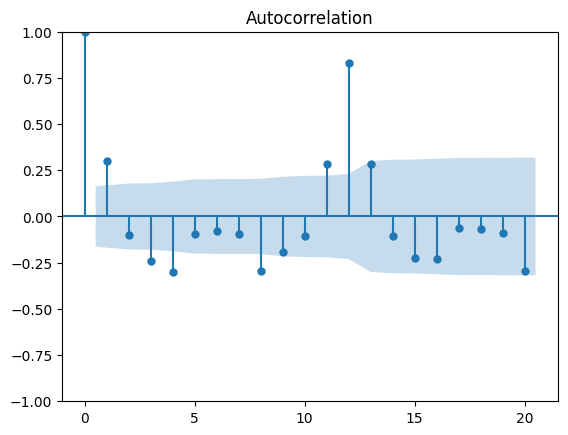

In [ ]:
plot_acf(airP['firstDiff'].dropna(),lags = 20)

In [ ]:
# p = 1 ,q = 3 and  d = 1

In [ ]:
round(len(airP)*70/100)

101

In [ ]:
train = airP[: round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100) :]
train.tail() ,test.head()

(            passengers  firstDiff  secondDiff
 yearMonth                                    
 1957-01-01         315        9.0       -26.0
 1957-02-01         301      -14.0       -23.0
 1957-03-01         356       55.0        69.0
 1957-04-01         348       -8.0       -63.0
 1957-05-01         355        7.0        15.0,
             passengers  firstDiff  secondDiff
 yearMonth                                    
 1957-06-01         422       67.0        60.0
 1957-07-01         465       43.0       -24.0
 1957-08-01         467        2.0       -41.0
 1957-09-01         404      -63.0       -65.0
 1957-10-01         347      -57.0         6.0)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train["passengers"]

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1957-01-01,315
1957-02-01,301
1957-03-01,356


In [ ]:
model = ARIMA(train["passengers"], order = (1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0] , end = test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,secondDiff,arimaPred
yearMonth,,,,
1960-08-01,606,-16.0,-103.0,341.111333
1960-09-01,508,-98.0,-82.0,341.111333
1960-10-01,461,-47.0,51.0,341.111333
1960-11-01,390,-71.0,-24.0,341.111333
1960-12-01,432,42.0,113.0,341.111333


<Axes: xlabel='yearMonth', ylabel='passengers'>

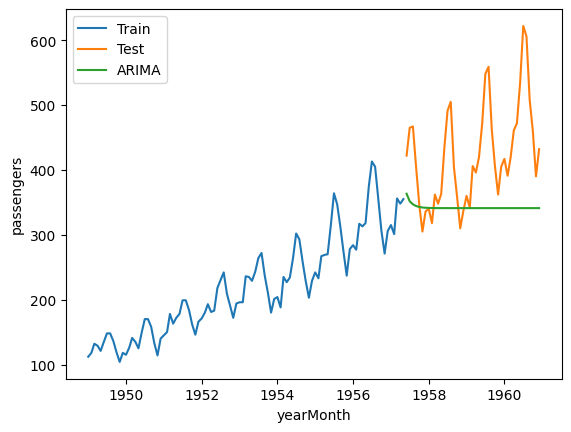

In [ ]:
sns.lineplot(data = train, x = train.index, y = train.passengers, label = "Train")
sns.lineplot(data = test, x = test.index, y = test.passengers, label = "Test")
sns.lineplot(data = airP, x = airP.index, y = airP.arimaPred, label = "ARIMA")

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test["passengers"], prediction))

111.1101033142743

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

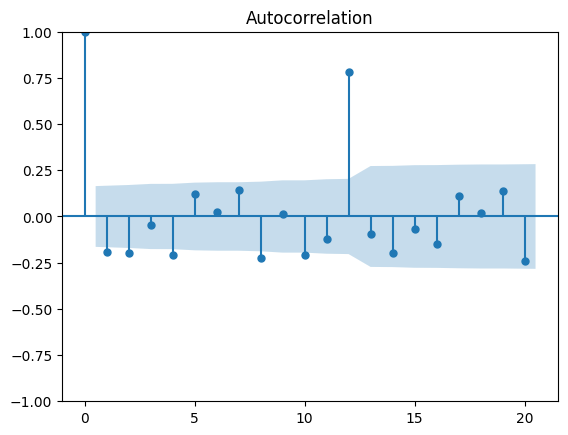

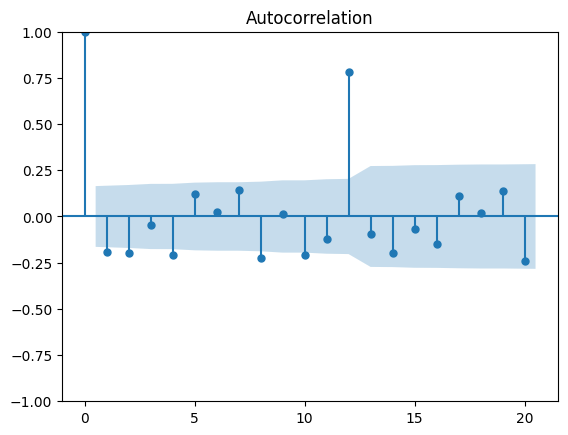

In [ ]:
plot_acf(airP['secondDiff'].dropna(), lags = 20)

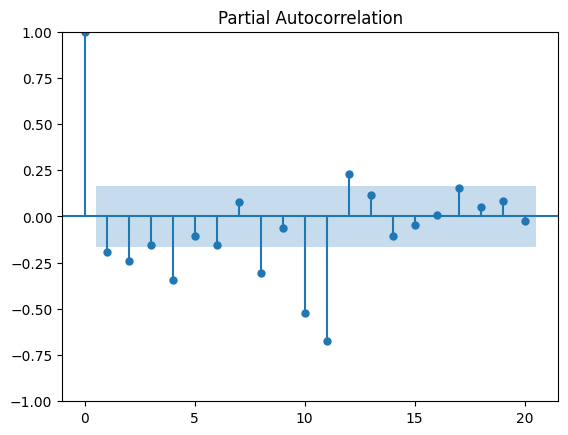

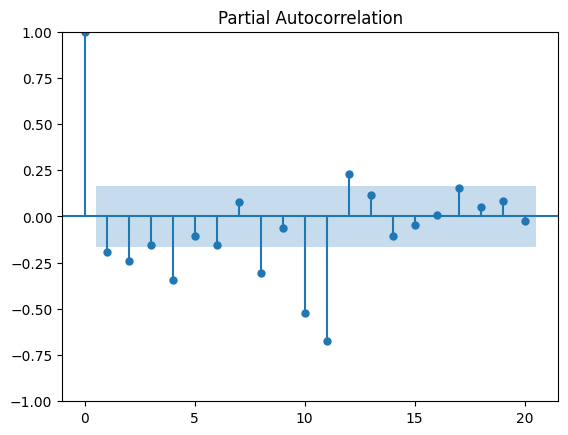

In [ ]:
plot_pacf(airP['secondDiff'].dropna(), lags = 20)

In [ ]:
model = SARIMAX(train["passengers"], order = (1,1,3), seasonal_order = (1,1,3,12) )
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0] , end = test.index[-1])
airP['sarimaxPred'] = prediction


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
airP.tail()

,passengers,firstDiff,secondDiff,arimaPred,sarimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,-103.0,341.111333,599.426270
1960-09-01,508,-98.0,-82.0,341.111333,534.545059
1960-10-01,461,-47.0,51.0,341.111333,479.577349
1960-11-01,390,-71.0,-24.0,341.111333,431.919762
1960-12-01,432,42.0,113.0,341.111333,477.429250


<Axes: xlabel='yearMonth', ylabel='passengers'>

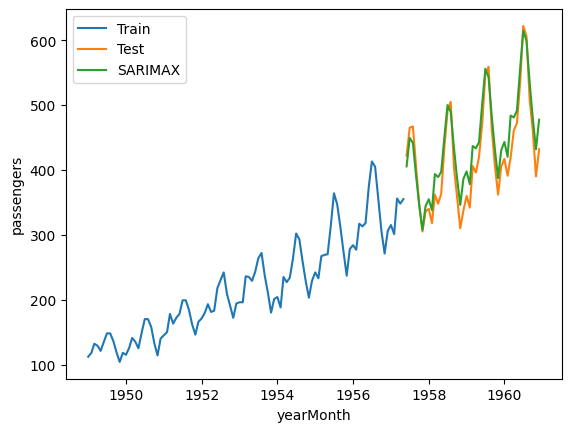

In [ ]:
sns.lineplot(data = train, x = train.index, y = train.passengers, label = "Train")
sns.lineplot(data = test, x = test.index, y = test.passengers, label = "Test")
sns.lineplot(data = airP, x = airP.index, y = airP.sarimaxPred, label = "SARIMAX")

In [ ]:
np.sqrt(mean_squared_error(test["passengers"], prediction))

27.68175159393607

In [ ]:
model = SARIMAX(train["passengers"], order = (2,1,2), seasonal_order = (2,1,2,12) )
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0] , end = test.index[-1])
airP['sarimaxPred'] = prediction


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='yearMonth', ylabel='passengers'>

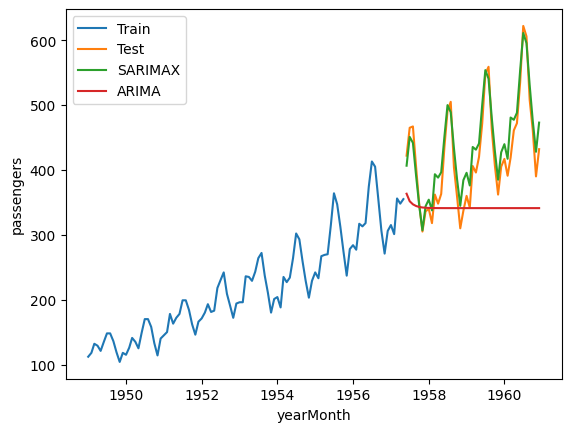

In [ ]:
sns.lineplot(data = train, x = train.index, y = train.passengers, label = "Train")
sns.lineplot(data = test, x = test.index, y = test.passengers, label = "Test")
sns.lineplot(data = airP, x = airP.index, y = airP.sarimaxPred, label = "SARIMAX")
sns.lineplot(data = airP, x = airP.index, y = airP.arimaPred, label = "ARIMA")


In [ ]:
np.sqrt(mean_squared_error(test["passengers"], prediction))

26.02976291902755

In [ ]:
airP.tail()

,passengers,firstDiff,secondDiff,arimaPred,sarimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,-103.0,341.111333,595.498839
1960-09-01,508,-98.0,-82.0,341.111333,530.672171
1960-10-01,461,-47.0,51.0,341.111333,475.248527
1960-11-01,390,-71.0,-24.0,341.111333,427.957648
1960-12-01,432,42.0,113.0,341.111333,472.950963


In [ ]:
pd.date_range(start = '1961-01-01', end = '1962-12-01',freq= 'MS')

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
# Generate a DataFrame with a Dates column
futureDate = pd.DataFrame({
    "Dates": pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS')
})
futureDate.set_index('Dates', inplace=True)
# Check the resulting DataFrame
futureDate

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01
1961-06-01
1961-07-01
1961-08-01
1961-09-01


<Axes: >

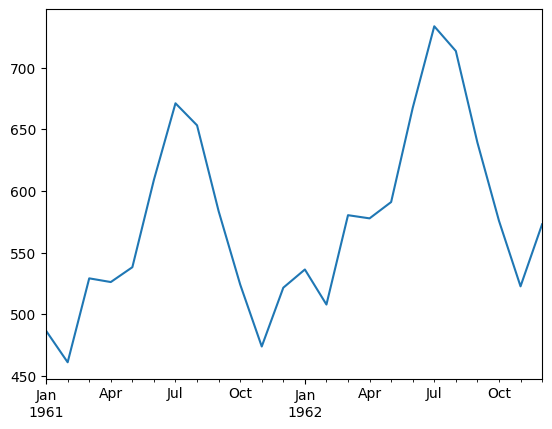

In [ ]:
model_fit.predict(start = futureDate.index[0] , end = futureDate.index[-1]).plot()

<Axes: xlabel='yearMonth', ylabel='passengers'>

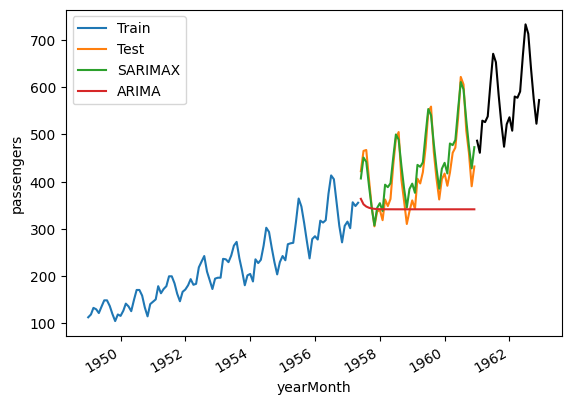

In [ ]:
sns.lineplot(data = train, x = train.index, y = train.passengers, label = "Train")
sns.lineplot(data = test, x = test.index, y = test.passengers, label = "Test")
sns.lineplot(data = airP, x = airP.index, y = airP.sarimaxPred, label = "SARIMAX")
sns.lineplot(data = airP, x = airP.index, y = airP.arimaPred, label = "ARIMA")
model_fit.predict(start = futureDate.index[0] , end = futureDate.index[-1]).plot(color = 'black')